# HIPPO for 2A Protease (5/?)

## Imports

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from pathlib import Path
import molparse as mp
import hippo2 as hippo
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from pprint import pprint
import json
import mout
import pickle

## Load the project

In [8]:
# animal = hippo.HIPPO.from_pickle('pickles/2A_hippo_fingerprinted_trim.pickle')
# animal = hippo.HIPPO.from_pickle('pickles/2A_hippo_random_latest.pickle')
# animal = hippo.HIPPO.from_pickle('pickles/hippo2_test_comps_shell_restart.pickle')
animal = hippo.HIPPO.from_pickle('pickles/2A_HIPPO_comps_final.pickle')

path = pickles/2A_HIPPO_comps_final.pickle 


In [9]:
for base in animal.bases:
    if 'fegrow' in base.name:
        continue
    print(base)

Compound(matteo-ferla-rocs-cov-Z2737383535-1-of-1-step-base, C=CC(=O)N1Cc2ccccc2OC(C)(C)C1, #poses=1)
Compound(matteo-ferla-rocs-cov-Z4425282901-1-of-1-step-base, C=CC(=O)NCC1(NC(=O)c2ccc(F)c3ccccc23)CCOCC1, #poses=1)
Compound(matteo-ferla-rocs-mixed-Z420031520-1-of-1-step-base, Cc1ccccc1CNC(=O)c1scnc1C, #poses=1)
Compound(matteo-ferla-rocs-mixed-Z645758468-1-of-1-step-base, COc1ccc2ccccc2c1CNC(=O)c1c(C)nn2c(C)cc(C)nc12, #poses=1)
Compound(matteo-ferla-rocs-mixed-Z27634076-1-of-1-step-base, Cc1cc(C(=O)NC(C)c2ccccc2Cl)no1, #poses=2)
Compound(matteo-ferla-rocs-mixed-Z27634076-1-of-1-step-base-2, Cc1cc(C(=O)NC2Cc3cccc(Cl)c32)no1, #poses=2)
Compound(matteo-ferla-rocs-mixed-Z1083845368-1-of-1-step-base, CC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)N1CCN(C)c2ccccc2C1, #poses=2)
Compound(matteo-ferla-rocs-cov-Z4899905008-1-of-1-step-base, C=CC(=O)NCc1ccccc1C(=O)Nc1cc(C(=O)Nc2nc(C)cs2)ccc1OC, #poses=1)
Compound(matteo-ferla-rocs-cov-Z4408138101-1-of-1-step-base, C=CC(=O)N(Cc1cc(Cl)c2c(c1)OCCCO2)C1CCCCNC1=O

In [ ]:
# Only use Fragnet base compounds

new_comps = []

for comp in animal.compounds:
    if 'hits' in comp.tags:
        continue

    if 'fragnetv2' in comp.name:
        new_comps.append(comp)

animal._compound_sets = hippo.csetlist.CompoundSetList([animal.hits])

print(len(new_comps))
new_cset = hippo.cset.CompoundSet('compounds', new_comps, duplicate='no_check')
print(new_cset)
new_bases = hippo.cset.CompoundSet('bases', animal.get_compounds('base'), duplicate='no_check')
print(new_bases)
new_elabs = hippo.cset.CompoundSet('elabs', animal.get_compounds('elab'), duplicate='no_check')
print(new_elabs)

animal._compounds = new_cset
animal.compound_sets.append(new_bases)
animal.compound_sets.append(new_elabs)

# print(new_cset)

In [54]:
animal.summary()

HIPPO(hippo2_test)                              
target_name = A71EV2A             
max_lead_time = 10 workdays       
max_bb_price = 300 $              
min_bb_quantity = 20 mg           
#compound_sets = 3                
#compounds = 12241                
#poses = 44972                    
#tags = 4                         
                                                        
compound sets:                                      
CompoundSet("hits", #compounds=38, #poses=49)           
CompoundSet("bases", #compounds=17, #poses=0)           
CompoundSet("elabs", #compounds=12224, #poses=44972)    
                                                        
tags:                                               
Syndirella #compounds=12240, #poses=44972               
base #compounds=16, #poses=0                            
too_contorted #compounds=2, #poses=0                    
elab #compounds=12223, #poses=44972                     


writing graphs/elabs_routes_fragnet.html ... Done.
writing graphs/elabs_routes_fragnet.png ... Done.


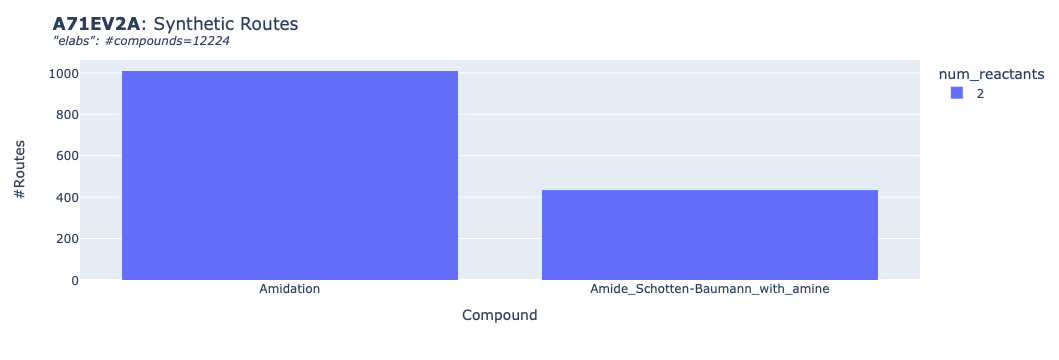

In [55]:
animal.plot_synthetic_routes(html='graphs/elabs_routes_fragnet', png='graphs/elabs_routes_fragnet')

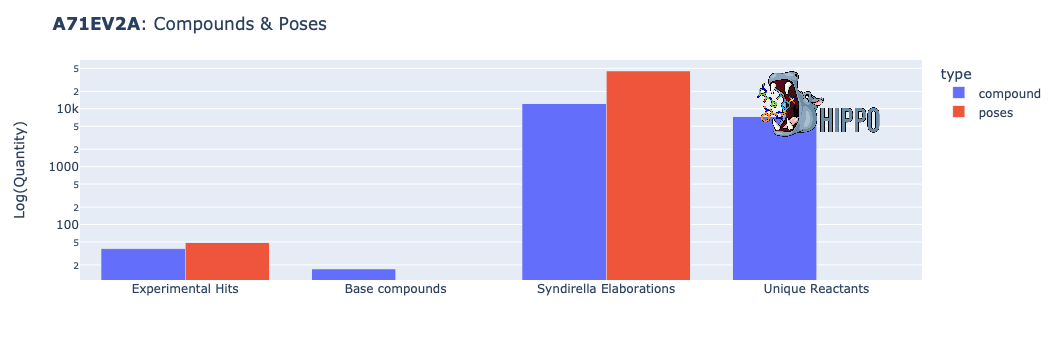

In [56]:
animal.plot_numbers()

writing graphs/reactant_prices_fragnet.html ... Done.
writing graphs/reactant_prices_fragnet.pdf ... Done.


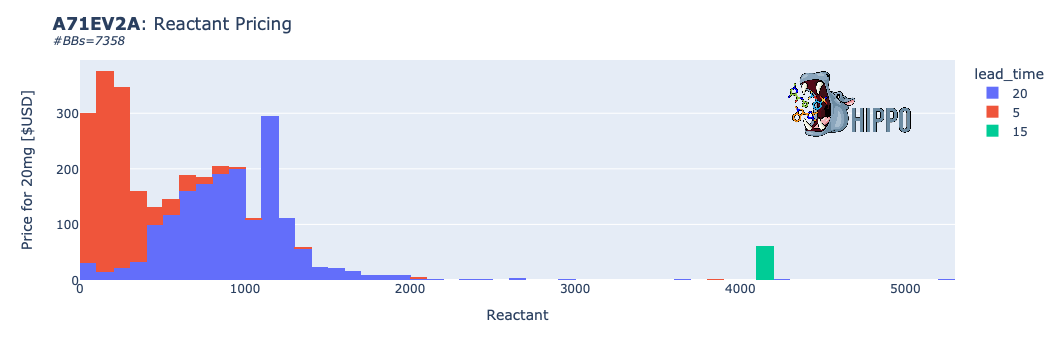

In [57]:
animal.plot_reactant_price(pdf='graphs/reactant_prices_fragnet', html='graphs/reactant_prices_fragnet')

0
writing graphs/reactant_sankey_fragnet.html ... Done.
writing graphs/reactant_sankey_fragnet.pdf ... Done.


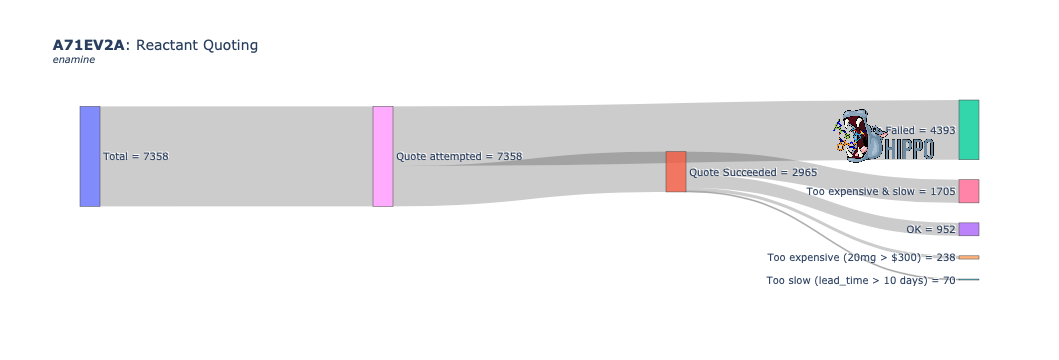

In [58]:
animal.plot_reactant_sankey(pdf='graphs/reactant_sankey_fragnet', html='graphs/reactant_sankey_fragnet')

In [82]:
from IPython.display import display

def inspiration_mcs(comp):

    comp_smiles = comp.smiles

    # drawings = []

    for inspiration in comp.inspirations:
        insp_smiles = mp.rdkit.mol_to_smiles(inspiration.mol)
        print(insp_smiles)

        display(mp.rdkit.draw_mcs({comp_smiles:comp.name, insp_smiles:inspiration.compound.name}, align_substructure=False))

    # return drawings

CN1CC(N)C(C(O)NC2CCC2)N1


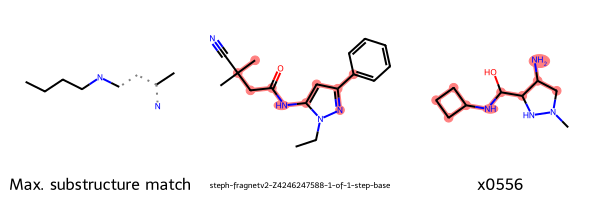

CC1NN(C)C(C)C1NC(O)CCN


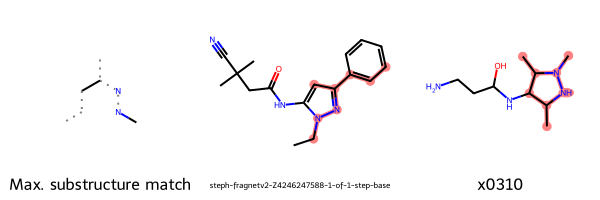

In [84]:
inspiration_mcs(animal.bases[1])

## Random BBS Generation

In [42]:
animal._bbs_id_counter = 0

In [43]:
for bb in animal.building_blocks:
    if bb.price_picker:
        assert bb.price_picker.min_price > 0

In [44]:
animal._min_bb_quantity = 10

In [45]:
# animal.building_blocks['EN300-54150']

In [46]:
output_directory = Path('bbs_fragnet_3k')

In [47]:
# test
mout.debug(animal.bbs_id_counter)
bbs, _ = animal.random_sample(3000, max_iter=5000, debug=False, increment_count=False)
bbs.write(output_directory, overwrite=True)

In [ ]:
for i in range(500):
    mout.debug(animal.bbs_id_counter)
    bbs, _ = animal.random_sample(8000, max_iter=5000, debug=False, increment_count=True)
    bbs.write(output_directory, overwrite=True)

In [ ]:
animal.write_pickle('pickles/2A_hippo_fragnet_random_latest.pickle')

In [ ]:
mout.success('DONE')

# Stuff that must go into JSON output:

- [x] inspirations
- [x] base
- [ ] lead_time?
- [ ] reaction info